In [20]:
import pandas as pd
import pyspark as spark
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
symbol = 'INFY'
df = pd.read_csv(symbol+'.csv',header=None)
dfTest = pd.read_csv(symbol+'Test.csv',header=None)
df.columns = ['Date','Sentiment_score','Price']
dfTest.columns = ['Date','Sentiment_score','Price']
df.head()

,Date,Sentiment_score,Price
0,2016-01-01T01:22:21,-0.7845,1105.25
1,2016-01-01T02:40:57,0.9118,1105.25
2,2016-01-01T02:51:51,-0.8360,1105.25
3,2016-01-01T03:00:34,0.7845,1105.25
4,2016-01-01T03:39:06,-0.4019,1105.25


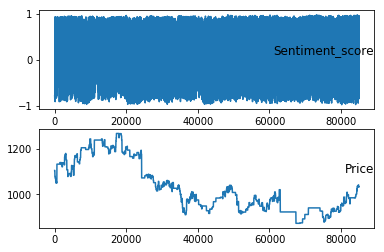

['2018-01-01T00:00:00' 0.5 0.5]


,Date,Sentiment_score,Price
0,2016-01-01T01:22:21,-0.7845,1105.25
1,2016-01-01T02:40:57,0.9118,1105.25
2,2016-01-01T02:51:51,-0.8360,1105.25
3,2016-01-01T03:00:34,0.7845,1105.25
4,2016-01-01T03:39:06,-0.4019,1105.25
5,2016-01-01T03:46:33,0.6597,1105.25
6,2016-01-01T03:58:46,0.5574,1105.25
7,2016-01-01T04:47:06,-0.8271,1105.25
8,2016-01-01T04:48:51,-0.4767,1105.25
9,2016-01-01T04:48:52,-0.4767,1105.25


In [22]:
values = df.values
valuesTest = dfTest.values
# specify columns to plot
groups = [ 1,2]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
print(valuesTest[-1])
df

In [23]:
df.set_index('Date',inplace=True) 
dfTest.set_index('Date',inplace=True)
cols = df.columns.tolist()
colsTest = dfTest.columns.tolist()
cols = cols[-1:] + cols[:-1]
colsTest = colsTest[-1:] + colsTest[:-1]
df = df[cols]
dfTest = dfTest[colsTest]
print(dfTest.values[-1])
df

[0.5 0.5]


,Price,Sentiment_score
Date,,
2016-01-01T01:22:21,1105.25,-0.7845
2016-01-01T02:40:57,1105.25,0.9118
2016-01-01T02:51:51,1105.25,-0.8360
2016-01-01T03:00:34,1105.25,0.7845
2016-01-01T03:39:06,1105.25,-0.4019
2016-01-01T03:46:33,1105.25,0.6597
2016-01-01T03:58:46,1105.25,0.5574
2016-01-01T04:47:06,1105.25,-0.8271
2016-01-01T04:48:51,1105.25,-0.4767


In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)
scaledTest = scaler.fit_transform(dfTest.values)

In [25]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    '''
    Converts the original dataframe to a format which contains
    lag shifted values of inputs which can be used as input
    to the LSTM
    '''
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [26]:
n_days = 3  #no of time lags
n_features = 1 #no of features
n_obs = n_days*n_features

In [27]:
reframed = series_to_supervised(scaled, n_days, 1)
reframedTest = series_to_supervised(scaledTest, n_days, 1)


In [28]:
reframed = reframed.drop(reframed.columns[-1], axis=1)
reframedTest = reframedTest.drop(reframedTest.columns[-1], axis=1)
reframed.head()

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
3,0.588153,0.100672,0.588153,0.964017,0.588153,0.074461,0.588153
4,0.588153,0.964017,0.588153,0.074461,0.588153,0.899226,0.588153
5,0.588153,0.074461,0.588153,0.899226,0.588153,0.295399,0.588153
6,0.588153,0.899226,0.588153,0.295399,0.588153,0.835708,0.588153
7,0.588153,0.295399,0.588153,0.835708,0.588153,0.783642,0.588153


In [29]:
values = reframed.values
n_train_hours = ceil(len(values)*0.8)

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape
data_set = pd.read_csv(symbol+'.csv')
data_set_dates = data_set.iloc[n_train_hours:,0]
data_set_dates_arr = []
for i in data_set_dates[:-2]:
    data_set_dates_arr.append(i.split("T")[0])
data_set_dates_arr = np.array(data_set_dates_arr)
print(data_set_dates_arr.shape)

(17005,)


In [30]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(len(test[0]))
print(test_X[-1])
print(test[-1])
print(test_y[-1])

7
[0.40626585 0.87810464 0.40626585]
[0.40626585 0.87810464 0.40626585 0.71447476 0.40626585 0.23188111
 0.40626585]
0.4062658548959921


In [31]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(68022, 3, 1) (68022,) (17005, 3, 1) (17005,)


In [32]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history

Train on 68022 samples, validate on 17005 samples
Epoch 1/2
 - 165s - loss: 0.0122 - val_loss: 0.1582
Epoch 2/2
 - 165s - loss: 0.0093 - val_loss: 0.1210


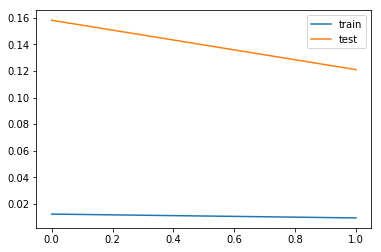

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days* n_features))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print(inv_y[-1])
print(inv_yhat[-1])

Test RMSE: 0.141
0.9062658548959921
0.6053564548492432


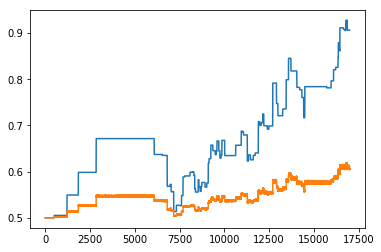

In [35]:
plt.plot(inv_y)
plt.plot(inv_yhat)
sumOfSquares = []
difference = []
for i in range(len(inv_y)):
    sumOfSquares.append((inv_y[i]-inv_yhat[i])**2)
    difference.append(inv_y[i]-inv_yhat[i])
sumOfSquares = np.array(sumOfSquares)
difference = np.array(difference)

In [36]:
plt.show()

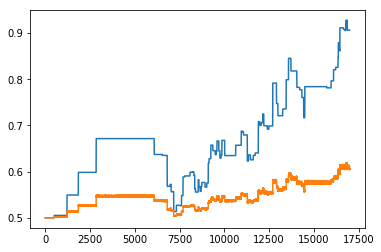

In [37]:
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

In [38]:
meanSumOfSquares = sum(sumOfSquares)/len(sumOfSquares)
rootMean = meanSumOfSquares**0.5

df_sol = pd.DataFrame({'1.Date':data_set_dates_arr,'3.Predicted':inv_yhat,'2.Actual':inv_y,'4.Difference':difference, '5.Squared Difference':sumOfSquares, '6.Mean Squared Difference':meanSumOfSquares,'7.RMSE':rootMean})
df_sol.to_csv('TwitterPredictions/Predictions_Single_'+symbol+'.csv')

In [20]:
## Multifeature Sentiment Analysis

In [47]:
df1 = pd.read_csv(symbol+'Features.csv',header=None)
df1.columns = ['DateTime','Negative','Neutral','Positive','Compound','Price']
df1.head()

,DateTime,Negative,Neutral,Positive,Compound,Price
0,2016-01-01T01:22:21,0.385,0.615,0.000,-0.7845,1105.25
1,2016-01-01T02:40:57,0.000,0.588,0.412,0.9118,1105.25
2,2016-01-01T02:51:51,0.450,0.431,0.120,-0.8360,1105.25
3,2016-01-01T03:00:34,0.000,0.711,0.289,0.7845,1105.25
4,2016-01-01T03:39:06,0.130,0.870,0.000,-0.4019,1105.25


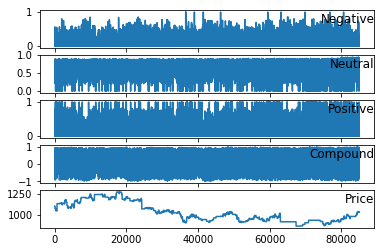

In [48]:
values = df1.values
# specify columns to plot
groups = [ 1,2,3,4,5]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df1.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [49]:
df1.set_index('DateTime',inplace=True)

In [50]:
cols = df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
df1 = df1[cols]
df1.tail()

,Price,Negative,Neutral,Positive,Compound
DateTime,,,,,
2017-12-31T20:01:03,1033.55,0.000,0.690,0.310,0.6590
2017-12-31T20:06:50,1033.55,0.000,0.488,0.512,0.7430
2017-12-31T20:20:12,1033.55,0.000,0.833,0.167,0.4215
2017-12-31T21:40:52,1033.55,0.102,0.898,0.000,-0.5267
2017-12-31T23:44:03,1033.55,0.000,0.917,0.083,0.4019


In [65]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1.values)
invScaled = scaler.inverse_transform(scaled)
print(invScaled)

[[ 1.10525e+03  3.85000e-01  6.15000e-01  0.00000e+00 -7.84500e-01]
 [ 1.10525e+03  0.00000e+00  5.88000e-01  4.12000e-01  9.11800e-01]
 [ 1.10525e+03  4.50000e-01  4.31000e-01  1.20000e-01 -8.36000e-01]
 ...
 [ 1.03355e+03  0.00000e+00  8.33000e-01  1.67000e-01  4.21500e-01]
 [ 1.03355e+03  1.02000e-01  8.98000e-01  0.00000e+00 -5.26700e-01]
 [ 1.03355e+03  0.00000e+00  9.17000e-01  8.30000e-02  4.01900e-01]]


In [52]:
n_days = 3
n_features = 5
n_obs = n_days*n_features

In [53]:
reframed = series_to_supervised(scaled, n_days, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.588153,0.385,0.653560,0.000,0.100672,0.588153,0.00,0.624867,0.412,0.964017,0.588153,0.45,0.458023,0.120,0.074461,0.588153,0.000,0.755579,0.289,0.899226
4,0.588153,0.000,0.624867,0.412,0.964017,0.588153,0.45,0.458023,0.120,0.074461,0.588153,0.00,0.755579,0.289,0.899226,0.588153,0.130,0.924548,0.000,0.295399
5,0.588153,0.450,0.458023,0.120,0.074461,0.588153,0.00,0.755579,0.289,0.899226,0.588153,0.13,0.924548,0.000,0.295399,0.588153,0.000,0.817216,0.231,0.835708
6,0.588153,0.000,0.755579,0.289,0.899226,0.588153,0.13,0.924548,0.000,0.295399,0.588153,0.00,0.817216,0.231,0.835708,0.588153,0.000,0.812965,0.235,0.783642
7,0.588153,0.130,0.924548,0.000,0.295399,0.588153,0.00,0.817216,0.231,0.835708,0.588153,0.00,0.812965,0.235,0.783642,0.588153,0.524,0.505845,0.000,0.078990


In [54]:
reframed = reframed.drop(reframed.columns[-4:], axis=1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
3,0.588153,0.385,0.653560,0.000,0.100672,0.588153,0.00,0.624867,0.412,0.964017,0.588153,0.45,0.458023,0.120,0.074461,0.588153
4,0.588153,0.000,0.624867,0.412,0.964017,0.588153,0.45,0.458023,0.120,0.074461,0.588153,0.00,0.755579,0.289,0.899226,0.588153
5,0.588153,0.450,0.458023,0.120,0.074461,0.588153,0.00,0.755579,0.289,0.899226,0.588153,0.13,0.924548,0.000,0.295399,0.588153
6,0.588153,0.000,0.755579,0.289,0.899226,0.588153,0.13,0.924548,0.000,0.295399,0.588153,0.00,0.817216,0.231,0.835708,0.588153
7,0.588153,0.130,0.924548,0.000,0.295399,0.588153,0.00,0.817216,0.231,0.835708,0.588153,0.00,0.812965,0.235,0.783642,0.588153


In [55]:
values = reframed.values
print(values[0])
n_train_hours = ceil(len(values)*0.8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
data_set = pd.read_csv(symbol+'Features.csv')
data_set_dates = data_set.iloc[n_train_hours:,0]
data_set_dates_arr = []
for i in data_set_dates[:-2]:
    data_set_dates_arr.append(i.split("T")[0])
data_set_dates_arr = np.array(data_set_dates_arr)
print(data_set_dates_arr.shape)
train.shape

[0.58815322 0.385      0.65356004 0.         0.10067182 0.58815322
 0.         0.62486716 0.412      0.96401669 0.58815322 0.45
 0.45802338 0.12       0.0744605  0.58815322]
(17005,)


(68022, 16)

In [56]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
print(train_X[0])
print(train_y[0])
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(test_X[0])
print(test_y[0])

[0.58815322 0.385      0.65356004 0.         0.10067182 0.58815322
 0.         0.62486716 0.412      0.96401669 0.58815322 0.45
 0.45802338 0.12       0.0744605 ]
0.45
[0.         0.         0.52391073 0.507      0.87438925 0.
 0.         0.82359192 0.225      0.75132329 0.         0.
 0.52391073 0.507      0.87438925]
0.0


In [57]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(68022, 3, 5) (68022,) (17005, 3, 5) (17005,)


In [58]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=2, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history

Train on 68022 samples, validate on 17005 samples
Epoch 1/2
 - 167s - loss: 0.0065 - val_loss: 0.0057
Epoch 2/2
 - 161s - loss: 0.0012 - val_loss: 0.0032


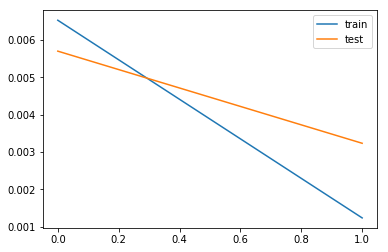

In [59]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [60]:
# make a prediction
print(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(test_X.shape)
print(test_X[-1])
print(test_y[-1])
print(test[-1])
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days* n_features))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
print(inv_y[-1])
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print(inv_y[-1])
print(inv_yhat[-1])

[[[0.         0.         0.52391073 0.507      0.87438925]
  [0.         0.         0.82359192 0.225      0.75132329]
  [0.         0.         0.52391073 0.507      0.87438925]]

 [[0.         0.         0.82359192 0.225      0.75132329]
  [0.         0.         0.52391073 0.507      0.87438925]
  [0.         0.22       0.82890542 0.         0.25732899]]

 [[0.         0.         0.52391073 0.507      0.87438925]
  [0.         0.22       0.82890542 0.         0.25732899]
  [0.         0.         0.79914984 0.248      0.75982288]]

 ...

 [[0.40626585 0.         0.51115834 0.519      0.75417345]
  [0.40626585 0.         0.73326249 0.31       0.8353522 ]
  [0.40626585 0.         0.51859724 0.512      0.87810464]]

 [[0.40626585 0.         0.73326249 0.31       0.8353522 ]
  [0.40626585 0.         0.51859724 0.512      0.87810464]
  [0.40626585 0.         0.88522848 0.167      0.71447476]]

 [[0.40626585 0.         0.51859724 0.512      0.87810464]
  [0.40626585 0.         0.88522848 0.16

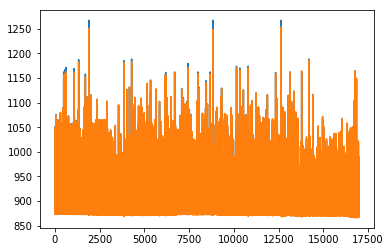

In [61]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [62]:
plt.show()

In [63]:
inv_yhat.shape

(17005,)

In [64]:
df_sol = pd.DataFrame({'Date':data_set_dates_arr,'actual':inv_y,'Predicted':inv_yhat})
df_sol.to_csv('TwitterPredictions/Predictions_Multi'+symbol+'.csv')